Este colab fue desarrollado por Arnold Charry Armero.

# Feature Scaling

Para empezar en el mundo de la ciencia de datos, primero se deben de normalizar o estandarizar los datos para que la magnitud de las características no afecte el resultado final y pueda haber objetividad a la hora de analizar los datos. En este colab se normalizará y estandarizará una base de datos. Asimismo, se codificarán las variables categóricas al final del colab para poder tratar modelos con estas características.

In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype, is_object_dtype, is_string_dtype
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

In [2]:
# Nos aseguramos de ver todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/loan_data.csv')

In [5]:
display(df)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


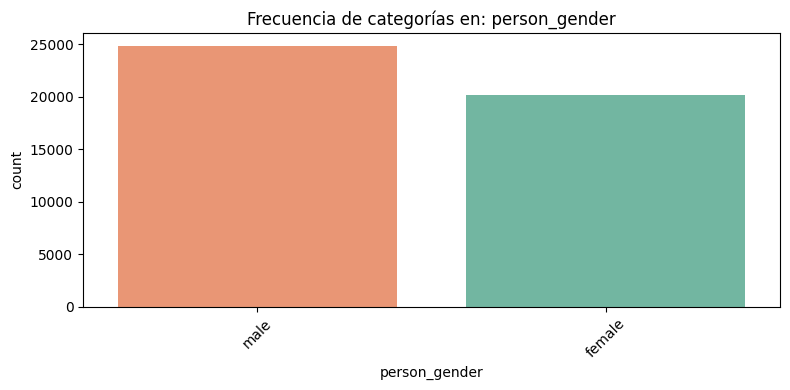

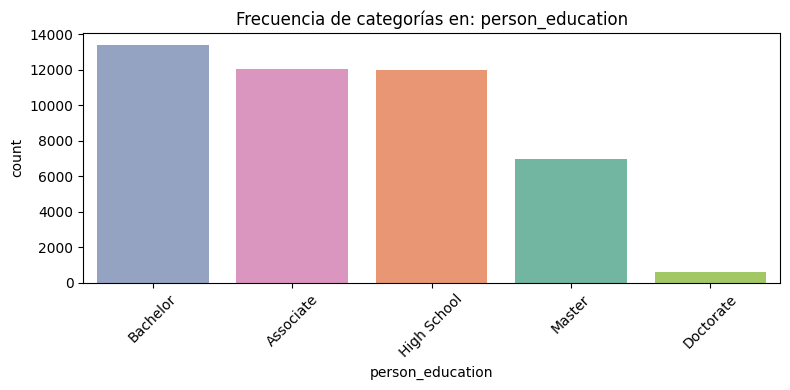

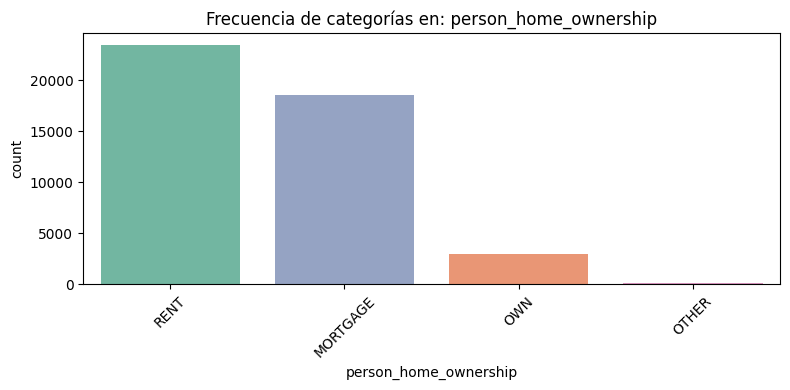

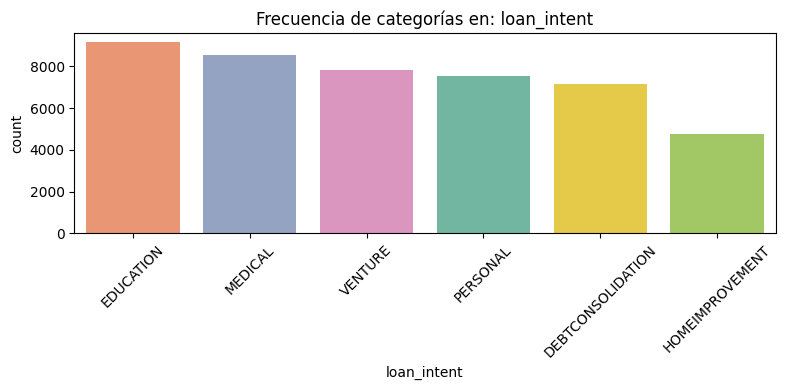

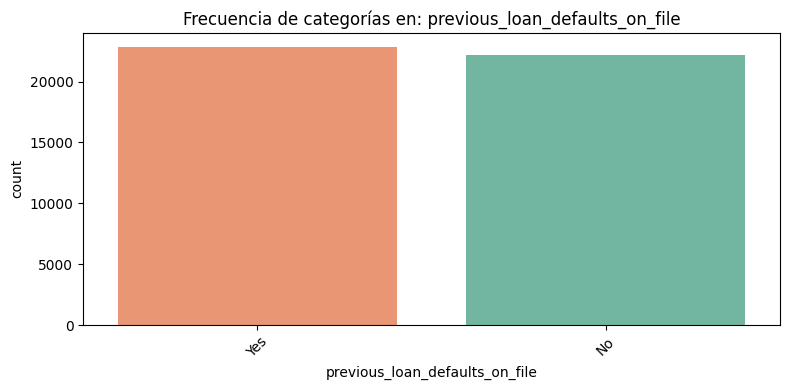

In [7]:
# Graficamos los datos categóricos
for col in df.columns:
    if is_object_dtype(df[col]) or isinstance(df[col].dtype, pd.CategoricalDtype):
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue=col, palette='Set2', order=df[col].value_counts().index, legend=False)
        plt.title(f'Frecuencia de categorías en: {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [8]:
# Tratamiento de Outliers
columnas_a_tratar = df.columns.difference(['loan_status'])

for col in columnas_a_tratar:
    if is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Límites para detectar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Mediana de la columna
        mediana = df[col].median()

        # Reemplazar outliers por la mediana
        df[col] = df[col].apply(lambda x: mediana if x < lower_bound or x > upper_bound else x)

In [9]:
# Tratamiento de valores faltantes
target_col = df.columns[-1]

for col in df.columns:
    if df[col].isnull().any():
        if col == target_col:
            imputer = SimpleImputer(strategy='most_frequent')
        elif is_numeric_dtype(df[col]):
            valores_unicos = df[col].dropna().unique()
            if set(valores_unicos).issubset({0, 1}) and len(valores_unicos) <= 2:
                imputer = SimpleImputer(strategy='most_frequent')
            else:
                imputer = SimpleImputer(strategy='mean')
        elif is_object_dtype(df[col]) or is_string_dtype(df[col]):
            imputer = SimpleImputer(strategy='most_frequent')
        else:
            continue

        # Imputar y reemplazar
        df[col] = imputer.fit_transform(df[[col]])

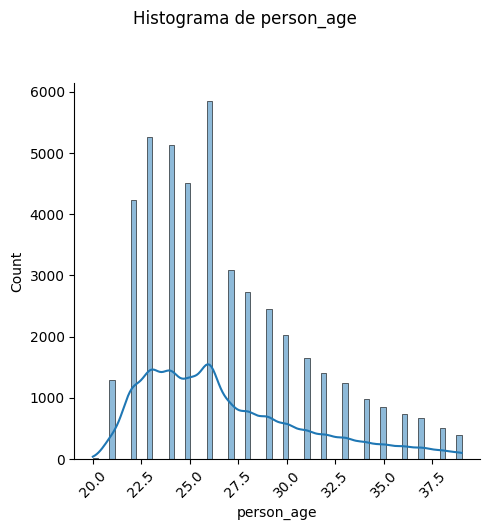

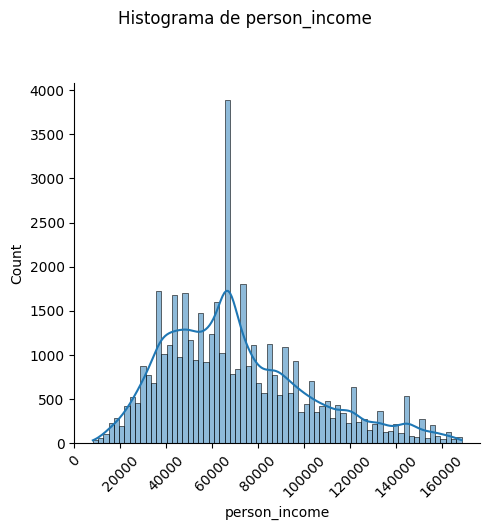

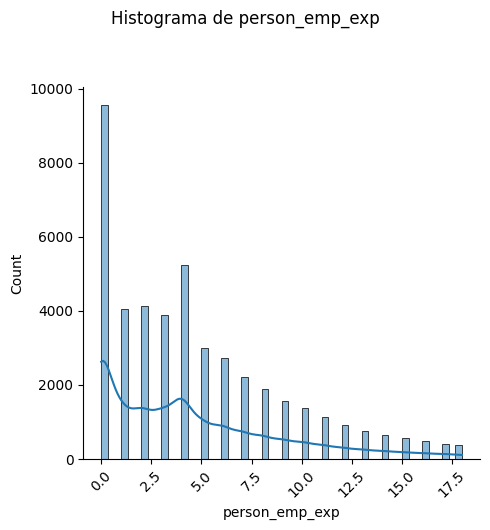

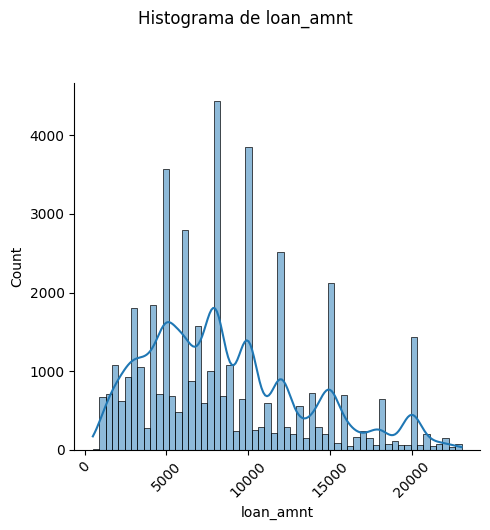

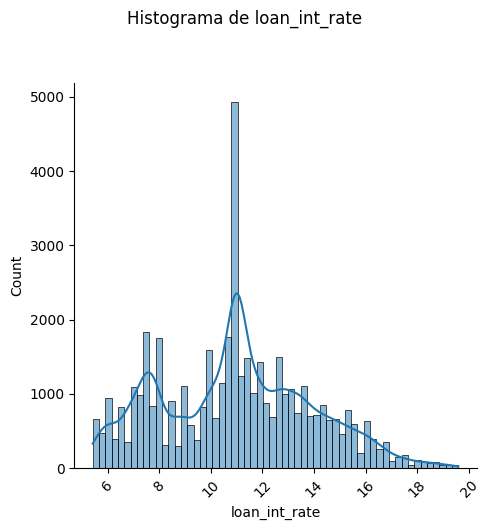

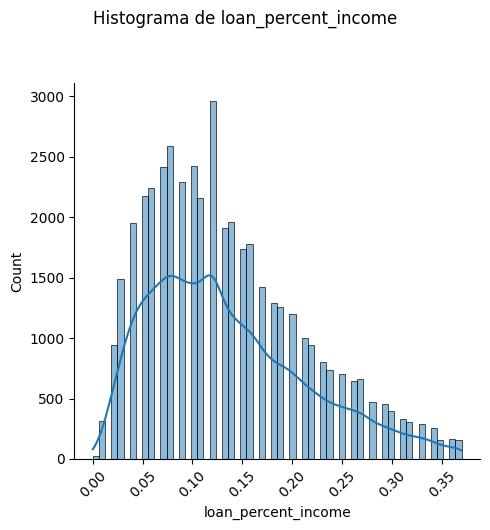

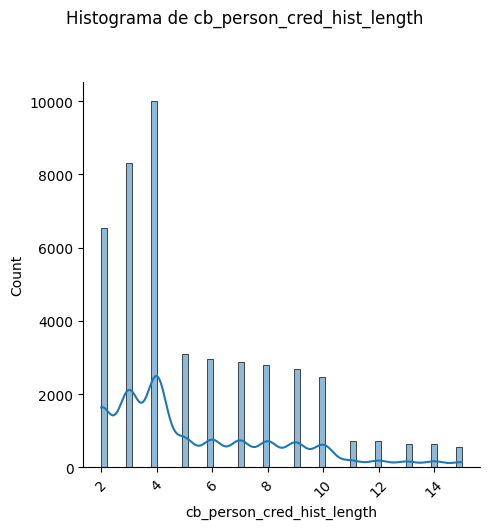

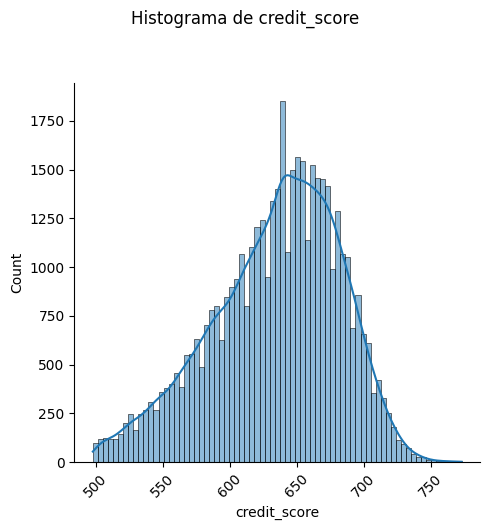

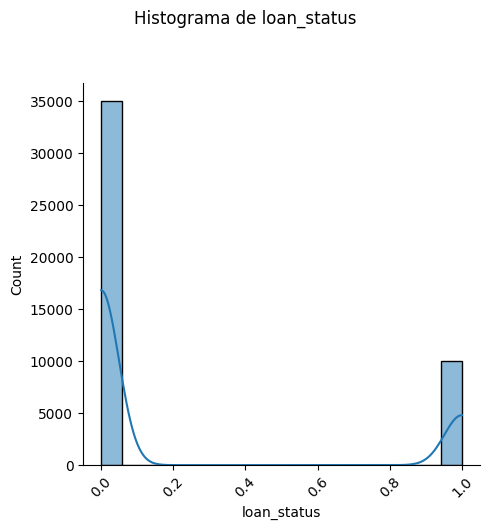

In [10]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        g = sns.displot(data=df, x=col, kde=True)
        g.fig.suptitle(f'Histograma de {col}', y= 1.05)

        # Rotar etiquetas del eje X
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [11]:
# Obtenemos el conjunto de datos
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Como se puede observar, hay una distribución de los datos que sigue unos patrones con sesgo. Por ende, lo mejor sería normalizarlos o estandarizarlos para un mejor uso del aprendizaje de máquina.

## Separación en Base de datos de Entrenamiento y Prueba

Antes de normalizar o estandarizar, se debe de separar los datos en entrenamiento y prueba. Esto es crucial para evitar una fuga de datos.

In [12]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Normalización

Para normalizar los datos se toman los valores máximo y mínimo de la característica de la base de datos y se comparan con una división dando un valor númerico único. Esto se puede ver en la siguiente ecuación:

$$  X^{'}=\frac{X-X_{min}}{X_{max}-X_{min}} $$

De esta manera se obtienen datos normalizados de tal forma que estén entre 0 y 1, incluyendo los extremos del intervalo [0, 1].


In [13]:
# Seleccionar columnas numéricas
numeric_cols = [col for col in X.columns if is_numeric_dtype(X[col])]

# Escalar solo esas columnas
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train[numeric_cols])
X_test_normalized = scaler.transform(X_test[numeric_cols])
X_train_normalized = pd.DataFrame(X_train_normalized, columns=numeric_cols)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=numeric_cols)
display(X_train_normalized)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,0.947368,0.209016,0.777778,0.232971,0.394495,0.378378,0.153846,0.543796
1,0.210526,0.124816,0.166667,0.288440,0.366972,0.675676,0.076923,0.551095
2,0.421053,0.346847,0.222222,0.288440,0.764996,0.297297,0.230769,0.467153
3,0.315789,0.522057,0.166667,0.031063,0.340861,0.027027,0.000000,0.598540
4,0.105263,0.134140,0.000000,0.421566,0.394495,0.918919,0.076923,0.492701
...,...,...,...,...,...,...,...,...
31495,0.315789,0.500775,0.333333,0.449301,0.043049,0.324324,0.153846,0.222628
31496,0.263158,0.166645,0.166667,0.238562,0.442484,0.459459,0.153846,0.543796
31497,0.684211,0.313203,0.500000,0.452940,0.375441,0.486486,0.538462,0.562044
31498,0.315789,0.367550,0.333333,0.865321,0.887085,0.297297,0.076923,0.386861


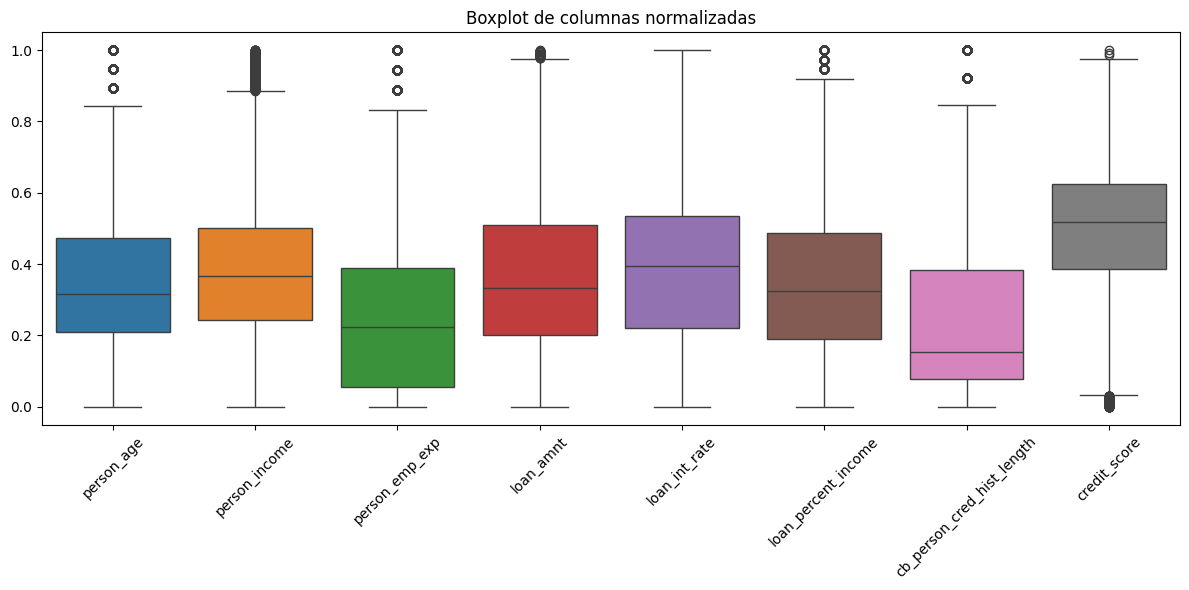

In [14]:
# Diagrama de Caja para columnas normalizadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_normalized.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot de columnas normalizadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Estandarización

La estandarización se basa en el supuesto de que los datos obedecen una distribución normal. Por ello, se transforman los datos con base en la media y la desviación estándar. Esto se puede observar en la siguiente ecuación:

$$  X^{'}=\frac{X-\mu }{\sigma } $$

De esta manera se obtienen datos que estén entre -5 y 5, incluyendo los valores extremos del intervalo [-5, 5].

In [15]:
# Seleccionar columnas numéricas
numeric_cols = [col for col in X.columns if is_numeric_dtype(X[col])]

# Escalar solo esas columnas
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train[numeric_cols])
X_test_standardized = scaler.transform(X_test[numeric_cols])
X_train_standardized = pd.DataFrame(X_train_standardized, columns=numeric_cols)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=numeric_cols)
display(X_train_standardized)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,2.681153,-0.918655,2.141119,-0.587881,0.013477,0.067130,-0.454381,0.268103
1,-0.672722,-1.345753,-0.365098,-0.331129,-0.118739,1.460723,-0.773347,0.310092
2,0.285528,-0.219519,-0.137260,-0.331129,1.793306,-0.312941,-0.135414,-0.172774
3,-0.193597,0.669218,-0.365098,-1.522460,-0.244174,-1.579845,-1.092314,0.583016
4,-1.151847,-1.298456,-1.048611,0.285077,0.013477,2.600936,-0.773347,-0.025815
...,...,...,...,...,...,...,...,...
31495,-0.193597,0.561268,0.318416,0.413453,-1.674817,-0.186251,-0.454381,-1.579383
31496,-0.433159,-1.133578,-0.365098,-0.562001,0.244007,0.447201,-0.454381,0.268103
31497,1.483341,-0.390174,1.001930,0.430296,-0.078057,0.573891,1.140453,0.373074
31498,-0.193597,-0.114504,0.318416,2.339096,2.379802,-0.312941,-0.773347,-0.634645


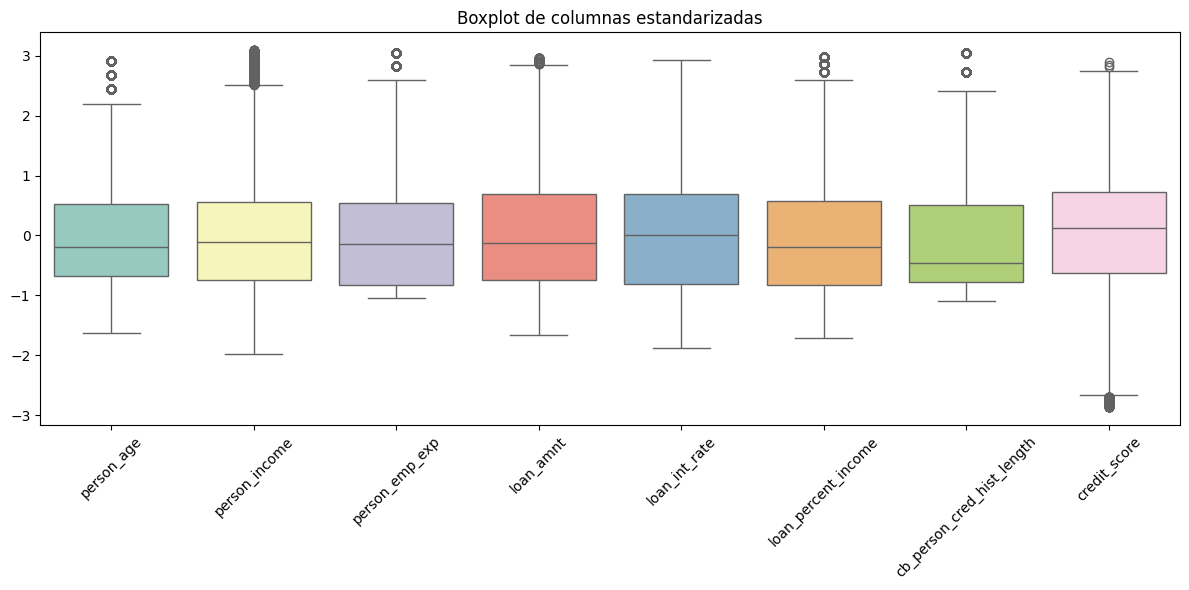

In [16]:
# Solo columnas numéricas
numeric_cols = X_train_standardized.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols, palette='Set3')
plt.title('Boxplot de columnas estandarizadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Manejo de Valores Categóricos

Se separan las columnas con variables categóricas y variables continuas. Esto para poder hacer un tratamiento de datos más ajustado y cualificado.

In [17]:
# Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Inicializar codificador OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False, dtype=int)

# Primero ajustar y transformar
encoded_data = encoder.fit_transform(X[cat_cols])

# Ahora sí obtener los nombres de columnas
encoded_cols = encoder.get_feature_names_out(cat_cols)

# Reemplazar X directamente con columnas numéricas + columnas dummy
X = pd.concat(
    [X[num_cols].reset_index(drop=True),
     pd.DataFrame(encoded_data, columns=encoded_cols)],
    axis=1)

Ahora tenemos el dataframe listo para hacerle modificaciones y tratamiento para modelos de aprendizaje de máquina.

In [18]:
display(X)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0.0,8000.0,16.02,0.12,3.0,561.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,21.0,12282.0,0.0,1000.0,11.14,0.08,2.0,504.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,25.0,12438.0,3.0,5500.0,12.87,0.12,3.0,635.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.0,0.0,8000.0,15.23,0.12,2.0,675.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.0,1.0,8000.0,14.27,0.12,4.0,586.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6.0,15000.0,15.66,0.31,3.0,645.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
44996,37.0,65800.0,17.0,9000.0,14.07,0.14,11.0,621.0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
44997,33.0,56942.0,7.0,2771.0,10.02,0.05,10.0,668.0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
44998,29.0,33164.0,4.0,12000.0,13.23,0.36,6.0,604.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [19]:
# Mirar los valores como Yes o No
y = y.map({1: 'Yes', 0: 'No'})
y.head()

,loan_status
0,Yes
1,No
2,Yes
3,Yes
4,Yes


In [20]:
# Mapear "Yes" a 1 y "No" a 0
y = y.map({'Yes': 1, 'No': 0}).astype(int)
y.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


## Estandarizar y Manejar Valores Catégoricos

In [28]:
# Convierte columnas numéricas mal tipadas a float o int
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            pass  # Si no puede convertirse, es realmente categórica

In [29]:
# Se detectan las columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_indices = [df.columns.get_loc(col) for col in cat_cols]

# Se detectan las columnas numéricas
num_indices = [i for i in range(df.shape[1] - 1) if i not in cat_indices]

# Se crea el transformador
ct = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_indices),
                  ('encoder', OneHotEncoder(drop='first',sparse_output=False, dtype=int), cat_indices)],
                    remainder='passthrough')

## Escalado de Datos

In [30]:
# Obtenemos el conjunto de datos
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
# Se escalan las variables
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [34]:
# Obteniendo los nombres
col_names = ct.get_feature_names_out()

X_train = pd.DataFrame(X_train, columns=col_names)
X_test = pd.DataFrame(X_test, columns=col_names)

In [35]:
display(X_train)

,num__person_age,num__person_income,num__person_emp_exp,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,num__credit_score,encoder__person_gender_male,encoder__person_education_Bachelor,encoder__person_education_Doctorate,encoder__person_education_High School,encoder__person_education_Master,encoder__person_home_ownership_OTHER,encoder__person_home_ownership_OWN,encoder__person_home_ownership_RENT,encoder__loan_intent_EDUCATION,encoder__loan_intent_HOMEIMPROVEMENT,encoder__loan_intent_MEDICAL,encoder__loan_intent_PERSONAL,encoder__loan_intent_VENTURE,encoder__previous_loan_defaults_on_file_Yes
0,2.681153,-0.918655,2.141119,-0.587881,0.013477,0.067130,-0.454381,0.268103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.672722,-1.345753,-0.365098,-0.331129,-0.118739,1.460723,-0.773347,0.310092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.285528,-0.219519,-0.137260,-0.331129,1.793306,-0.312941,-0.135414,-0.172774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.193597,0.669218,-0.365098,-1.522460,-0.244174,-1.579845,-1.092314,0.583016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.151847,-1.298456,-1.048611,0.285077,0.013477,2.600936,-0.773347,-0.025815,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31495,-0.193597,0.561268,0.318416,0.413453,-1.674817,-0.186251,-0.454381,-1.579383,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31496,-0.433159,-1.133578,-0.365098,-0.562001,0.244007,0.447201,-0.454381,0.268103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31497,1.483341,-0.390174,1.001930,0.430296,-0.078057,0.573891,1.140453,0.373074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
31498,-0.193597,-0.114504,0.318416,2.339096,2.379802,-0.312941,-0.773347,-0.634645,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
display(X_test)

,num__person_age,num__person_income,num__person_emp_exp,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,num__credit_score,encoder__person_gender_male,encoder__person_education_Bachelor,encoder__person_education_Doctorate,encoder__person_education_High School,encoder__person_education_Master,encoder__person_home_ownership_OTHER,encoder__person_home_ownership_OWN,encoder__person_home_ownership_RENT,encoder__loan_intent_EDUCATION,encoder__loan_intent_HOMEIMPROVEMENT,encoder__loan_intent_MEDICAL,encoder__loan_intent_PERSONAL,encoder__loan_intent_VENTURE,encoder__previous_loan_defaults_on_file_Yes
0,1.243778,0.826929,1.229768,-0.228428,-1.671427,-0.693012,1.459419,-0.697628,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.672722,-0.436872,0.318416,0.079675,0.176204,0.320510,-0.454381,0.268103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.151847,-1.053822,-1.048611,-0.741933,1.325465,-0.059561,-0.454381,1.611730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.912284,-0.970278,-0.820773,-0.741933,1.023742,-0.059561,-0.773347,-0.781605,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.193597,-0.085267,-0.137260,0.285077,1.505143,0.193820,1.778386,-1.012540,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,0.045966,-1.019281,0.546254,-0.536531,1.145787,0.320510,0.502519,0.981905,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13496,-0.193597,-0.114504,3.052470,2.339096,-1.376484,-0.312941,-0.454381,1.149858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13497,-0.672722,-0.830565,-0.592935,-0.125727,-0.386560,0.573891,-0.773347,1.737694,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13498,2.681153,-0.793181,-0.137260,-1.152737,0.023648,-0.819703,2.416319,-1.873301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Referencias

*   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: with Applications in R. https://link.springer.com/content/pdf/10.1007/978-1-0716-1418-1.pdf